# **Import Libraries & Load Dataset**

**Necessary Libraries**

In [ ]:
!pip install gdown pycountry -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gdown
import ipywidgets as widgets
from IPython.display import display, HTML
from google.colab import files
from tabulate import tabulate
import warnings
import pycountry

**Dataset Load**

In [ ]:
file_id = "1JDFDsM9H8fv7VI8DWJMI0MYpGsByvXGF"
file_url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"

gdown.download(file_url, output, quiet=False)
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1JDFDsM9H8fv7VI8DWJMI0MYpGsByvXGF
To: /content/data.csv
100%|██████████| 43.8k/43.8k [00:00<00:00, 21.8MB/s]


In [ ]:
df.head()

,Country,Region,Area (sqkm),Population,Median Age,Population Growth(%),Birth Rate,Death Rate,GDP Growth Rate,GDP Per Capita,...,Unemployment Rate,Exports,Imports,Reserves (FE&Gold),External Debt,Electricity Generate (kW),CO2 Emission (mt),Broadband(FixedSubs),Airports,Education Expend (% of GDP)
0,Afghanistan,South Asia,"652,230","40,121,552",20.0,2.22,34.2,11.8,2.71,"$2,000",...,13.3,"$1,476,000,000","$6,983,000,000","$9,749,000,000","$2,717,000,000","627,000","7,757,000","33,000",68,4.3
1,Akrotiri and Dhekelia,Europe,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,"28,748","3,107,100",36.3,0.16,12.3,7.4,3.94,"$18,200",...,10.2,"$9,099,000,000","$10,374,000,000","$6,455,000,000","$5,363,000,000","2,857,000","3,392,000","632,000",3,2.9
3,Algeria,Africa,"2,381,740","47,022,473",29.1,1.54,20.2,4.4,4.10,"$15,200",...,11.4,"$59,426,000,000","$51,131,000,000","$68,448,000,000","$4,764,000,000","22,591,000","163,661,000","5,540,000",95,5.6
4,American Samoa,Australia and Oceania,224,"43,895",30.0,-1.54,15.7,6.3,1.74,"$11,200",...,NaN,"$409,000,000","$677,000,000",NaN,NaN,"50,000","389,000",NaN,3,NaN


# **Data Preprocessing**

**Initial Inspection**

In [ ]:
# Shape of the dataset
print(f"Initial Shape: {df.shape}")

Initial Shape: (252, 21)


In [ ]:
# Null Values for Each Column
print(df.isnull().sum())

Country                          0
Region                           2
Area (sqkm)                      2
Population                      15
Median Age                      23
Population Growth(%)            16
Birth Rate                      24
Death Rate                      23
GDP Growth Rate                 32
GDP Per Capita                  30
Inflation                       36
Unemployment Rate               50
Exports                         30
Imports                         32
Reserves (FE&Gold)              57
External Debt                  130
Electricity Generate (kW)       41
CO2 Emission (mt)               36
Broadband(FixedSubs)            35
Airports                        18
Education Expend (% of GDP)     51
dtype: int64


In [ ]:
# Column data types
print("Data Types:\n",df.dtypes)

Data Types:
 Country                         object
Region                          object
Area (sqkm)                     object
Population                      object
Median Age                     float64
Population Growth(%)           float64
Birth Rate                     float64
Death Rate                     float64
GDP Growth Rate                float64
GDP Per Capita                  object
Inflation                       object
Unemployment Rate              float64
Exports                         object
Imports                         object
Reserves (FE&Gold)              object
External Debt                   object
Electricity Generate (kW)       object
CO2 Emission (mt)               object
Broadband(FixedSubs)            object
Airports                        object
Education Expend (% of GDP)    float64
dtype: object


In [ ]:
# Initial Exploration
print("Cleaned column names by removing whitespace:\n")
print(df.columns.str.strip())
df.columns = df.columns.str.strip()

Cleaned column names by removing whitespace:

Index(['Country', 'Region', 'Area (sqkm)', 'Population', 'Median Age',
       'Population Growth(%)', 'Birth Rate', 'Death Rate', 'GDP Growth Rate',
       'GDP Per Capita', 'Inflation', 'Unemployment Rate', 'Exports',
       'Imports', 'Reserves (FE&Gold)', 'External Debt',
       'Electricity Generate (kW)', 'CO2 Emission (mt)',
       'Broadband(FixedSubs)', 'Airports', 'Education Expend (% of GDP)'],
      dtype='object')


In [ ]:
# Missing data calculation
missing_df = pd.DataFrame({
    'column_name': df.columns,
    'missing_percentage': df.isnull().mean() * 100
}).sort_values('missing_percentage', ascending=False)

for _, row in missing_df.iterrows():
    print(f"{row['column_name']}: {row['missing_percentage']:.2f}%")

print(f"\nTotal Null Values: {df.isnull().sum().sum()}")

External Debt: 51.59%
Reserves (FE&Gold): 22.62%
Education Expend (% of GDP): 20.24%
Unemployment Rate: 19.84%
Electricity Generate (kW): 16.27%
CO2 Emission (mt): 14.29%
Inflation: 14.29%
Broadband(FixedSubs): 13.89%
Imports: 12.70%
GDP Growth Rate: 12.70%
GDP Per Capita: 11.90%
Exports: 11.90%
Birth Rate: 9.52%
Median Age: 9.13%
Death Rate: 9.13%
Airports: 7.14%
Population Growth(%): 6.35%
Population: 5.95%
Area (sqkm): 0.79%
Region: 0.79%
Country: 0.00%

Total Null Values: 683


In [ ]:
# Make a copy of main dataset
preData = df.copy()

In [ ]:
# Convert numeric-looking object columns to float
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '', regex=False)
            df[col] = df[col].str.replace('$', '', regex=False)
            df[col] = pd.to_numeric(df[col])
        except:
            pass

In [ ]:
# Handle 0.0 values
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].replace(0.0, np.nan)
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Fill missing values
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print(f"Remaining nulls after cleaning: {df.isnull().sum().sum()}")

Remaining nulls after cleaning: 0


In [ ]:
# Handle outliers (Inflation)
if 'Inflation' in df.columns and 'Country' in df.columns:
    inflation_others = df.loc[df['Country'] != 'Venezuela', 'Inflation']
    mean_inflation = inflation_others.mean()
    max_inflation = inflation_others.max()
    replacement_value = mean_inflation + max_inflation
    df.loc[df['Country'] == 'Venezuela', 'Inflation'] = round(replacement_value, 2)

In [ ]:
# Change column data types
object_cols = ['Country', 'Region']
int_cols = [
    'Area (sqkm)', 'Population', 'Reserves (FE&Gold)','GDP Per Capita', 'Exports', 'Imports', 'Reserves',
    'External Debt', 'Electricity Generate (kW)', 'CO2 Emission (mt)', 'Broadband(FixedSubs)', 'Aiports'
]
float_cols = [
    'Median Age', 'Population Growth(%)', 'Birth Rate', 'Death Rate',
    'GDP Growth Rate', 'Inflation', 'Unemployment Rate', 'Education Expend (% of GDP)'
]

In [ ]:
# Convert columns to correct data types
for col in object_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

for col in int_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

for col in float_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').round(2)

In [ ]:
# Shape before & after cleaning
print(f"Dataset Shape-Before: {preData.shape}")
print(f"Dataset Shape-After: {df.shape}")

Dataset Shape-Before: (252, 21)
Dataset Shape-After: (252, 21)


In [ ]:
print("Remaining nulls:", df.isnull().sum().sum())

Remaining nulls: 0


In [ ]:
df.head()

,Country,Region,Area (sqkm),Population,Median Age,Population Growth(%),Birth Rate,Death Rate,GDP Growth Rate,GDP Per Capita,...,Unemployment Rate,Exports,Imports,Reserves (FE&Gold),External Debt,Electricity Generate (kW),CO2 Emission (mt),Broadband(FixedSubs),Airports,Education Expend (% of GDP)
0,Afghanistan,South Asia,652230,40121552,20.0,2.22,34.20,11.8,2.71,2000,...,13.3,1476000000,6983000000,9749000000,2717000000,627000,7757000,33000,68.0,4.3
1,Akrotiri and Dhekelia,Europe,254,5563649,32.4,0.75,14.85,7.2,2.95,17650,...,5.3,11561000000,13266500000,5118000000,6712000000,3334000,10125000,419000,32.0,4.1
2,Albania,Europe,28748,3107100,36.3,0.16,12.30,7.4,3.94,18200,...,10.2,9099000000,10374000000,6455000000,5363000000,2857000,3392000,632000,3.0,2.9
3,Algeria,Africa,2381740,47022473,29.1,1.54,20.20,4.4,4.10,15200,...,11.4,59426000000,51131000000,68448000000,4764000000,22591000,163661000,5540000,95.0,5.6
4,American Samoa,Australia and Oceania,224,43895,30.0,-1.54,15.70,6.3,1.74,11200,...,5.3,409000000,677000000,5118000000,6712000000,50000,389000,419000,3.0,4.1


**Basic Summaries**

In [ ]:
# Summary Statistics
basicSummaries = df.describe(include='all')
basicSummaries = basicSummaries.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
display(HTML(''' <h3 style="text-align:center;">Summary Statistics</h3> <hr style="border:1px solid white;">'''))
display(basicSummaries.T)

/tmp/ipython-input-20-3850348898.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basicSummaries = basicSummaries.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,252,252,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,252,11,Africa,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area (sqkm),252.0,NaN,NaN,NaN,598361.79,1915932.63,2.0,798.25,62045.0,362245.25,17098242.0
Population,252.0,NaN,NaN,NaN,32304397.81,131600457.07,50.0,456244.75,5563649.0,20394783.5,1416043270.0
Median Age,252.0,NaN,NaN,NaN,32.72,8.82,15.2,25.85,32.4,39.9,56.9
Population Growth(%),252.0,NaN,NaN,NaN,0.9,1.01,-2.24,0.25,0.75,1.5,4.65
Birth Rate,252.0,NaN,NaN,NaN,17.04,8.28,6.0,10.9,14.85,20.57,46.6
Death Rate,252.0,NaN,NaN,NaN,7.51,2.62,1.4,5.8,7.2,8.9,18.6
GDP Growth Rate,252.0,NaN,NaN,NaN,3.16,6.34,-20.11,1.29,2.95,4.67,75.06
GDP Per Capita,252.0,NaN,NaN,NaN,26286.14,25620.46,800.0,6875.0,17650.0,37325.0,132800.0


**Top 10 Rankings**

In [ ]:
# Function for Top 10 Rankings
def topRank(df, value_col, country_col='country', top_n=10, title=None):
    df = df.dropna(subset=[value_col, country_col]).copy()
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
    top = df.sort_values(by=value_col, ascending=False).head(top_n)
    top = top[[country_col, value_col]].reset_index(drop=True)
    top.index += 1
    top.columns = ['Country', value_col.replace('_', ' ').title()]

    display_df = top.copy()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        display_df.iloc[:, 1] = display_df.iloc[:, 1].apply(lambda x: f"{int(x):,}")

    final_title = title if title else f"Top {top_n} Countries by {value_col.replace('_', ' ').title()}"
    print(f"\n{final_title}\n")
    print(tabulate(display_df, headers='keys', tablefmt='grid', showindex=True, numalign='right', stralign='left'))

In [ ]:
# Top 10 Countries by Population
topRank(df, 'Population', country_col='Country')


Top 10 Countries by Population

+----+---------------+---------------+
|    | Country       | Population    |
+====+===============+===============+
|  1 | China         | 1,416,043,270 |
+----+---------------+---------------+
|  2 | India         | 1,409,128,296 |
+----+---------------+---------------+
|  3 | United States | 341,963,408   |
+----+---------------+---------------+
|  4 | Indonesia     | 281,562,465   |
+----+---------------+---------------+
|  5 | Pakistan      | 252,363,571   |
+----+---------------+---------------+
|  6 | Nigeria       | 236,747,130   |
+----+---------------+---------------+
|  7 | Brazil        | 220,051,512   |
+----+---------------+---------------+
|  8 | Bangladesh    | 168,697,184   |
+----+---------------+---------------+
|  9 | Russia        | 140,820,810   |
+----+---------------+---------------+
| 10 | Mexico        | 130,739,927   |
+----+---------------+---------------+


In [ ]:
# Top 10 Countries by GDP Growth Rate (%)
topRank(df, 'GDP Growth Rate', country_col='Country')


Top 10 Countries by Gdp Growth Rate

+----+-----------------------------------+-------------------+
|    | Country                           |   Gdp Growth Rate |
+====+===================================+===================+
|  1 | Macau                             |                75 |
+----+-----------------------------------+-------------------+
|  2 | Guyana                            |                33 |
+----+-----------------------------------+-------------------+
|  3 | Falkland Islands (Islas Malvinas) |                25 |
+----+-----------------------------------+-------------------+
|  4 | Northern Mariana Islands          |                16 |
+----+-----------------------------------+-------------------+
|  5 | Cook Islands                      |                10 |
+----+-----------------------------------+-------------------+
|  6 | Libya                             |                10 |
+----+-----------------------------------+-------------------+
|  7 | Samoa     

In [ ]:
# Top 10 Countries by GDP Per Capita (USD)
topRank(df, 'GDP Per Capita', country_col='Country')


Top 10 Countries by Gdp Per Capita

+----+-------------+------------------+
|    | Country     | Gdp Per Capita   |
+====+=============+==================+
|  1 | Luxembourg  | 132,800          |
+----+-------------+------------------+
|  2 | Singapore   | 127,500          |
+----+-------------+------------------+
|  3 | Qatar       | 116,200          |
+----+-------------+------------------+
|  4 | Monaco      | 115,700          |
+----+-------------+------------------+
|  5 | Ireland     | 114,900          |
+----+-------------+------------------+
|  6 | Macau       | 105,000          |
+----+-------------+------------------+
|  7 | Bermuda     | 98,000           |
+----+-------------+------------------+
|  8 | Norway      | 90,500           |
+----+-------------+------------------+
|  9 | Isle of Man | 84,600           |
+----+-------------+------------------+
| 10 | Switzerland | 82,600           |
+----+-------------+------------------+


In [ ]:
# Top 10 Countries by Reserves FE-Gold (Billion)
topRank(df, 'Reserves (FE&Gold)', country_col='Country')


Top 10 Countries by Reserves (Fe&Gold)

+----+--------------+----------------------+
|    | Country      | Reserves (Fe&Gold)   |
+====+==============+======================+
|  1 | China        | 3,265,000,000,000    |
+----+--------------+----------------------+
|  2 | Japan        | 1,160,000,000,000    |
+----+--------------+----------------------+
|  3 | Switzerland  | 822,130,000,000      |
+----+--------------+----------------------+
|  4 | Russia       | 597,217,000,000      |
+----+--------------+----------------------+
|  5 | India        | 569,544,000,000      |
+----+--------------+----------------------+
|  6 | Taiwan       | 456,700,000,000      |
+----+--------------+----------------------+
|  7 | Saudi Arabia | 436,769,000,000      |
+----+--------------+----------------------+
|  8 | Hong Kong    | 425,554,000,000      |
+----+--------------+----------------------+
|  9 | Korea South  | 409,457,000,000      |
+----+--------------+----------------------+
| 10 | Singapo

In [ ]:
# Top 10 Countries by CO2 Emission (Metric Ton)
topRank(df, 'CO2 Emission (mt)', country_col='Country')


Top 10 Countries by Co2 Emission (Mt)

+----+---------------+---------------------+
|    | Country       | Co2 Emission (Mt)   |
+====+===============+=====================+
|  1 | China         | 12,196,000,000      |
+----+---------------+---------------------+
|  2 | United States | 4,795,000,000       |
+----+---------------+---------------------+
|  3 | India         | 2,821,000,000       |
+----+---------------+---------------------+
|  4 | Russia        | 1,844,000,000       |
+----+---------------+---------------------+
|  5 | Japan         | 960,230,000         |
+----+---------------+---------------------+
|  6 | Indonesia     | 829,655,000         |
+----+---------------+---------------------+
|  7 | Iran          | 823,364,000         |
+----+---------------+---------------------+
|  8 | Saudi Arabia  | 656,511,000         |
+----+---------------+---------------------+
|  9 | Korea South   | 644,231,000         |
+----+---------------+---------------------+
| 10 | Germany 

In [ ]:
# Snapshot of Cleaned Data
df.to_csv('/content/cleanData.csv', index=False)

print("\nSnapshot of Final Cleaned Dataset:")
print(df.head())


Snapshot of Final Cleaned Dataset:
                 Country                 Region  Area (sqkm)  Population  \
0            Afghanistan             South Asia       652230    40121552   
1  Akrotiri and Dhekelia                 Europe          254     5563649   
2                Albania                 Europe        28748     3107100   
3                Algeria                 Africa      2381740    47022473   
4         American Samoa  Australia and Oceania          224       43895   

   Median Age  Population Growth(%)  Birth Rate  Death Rate  GDP Growth Rate  \
0        20.0                  2.22       34.20        11.8             2.71   
1        32.4                  0.75       14.85         7.2             2.95   
2        36.3                  0.16       12.30         7.4             3.94   
3        29.1                  1.54       20.20         4.4             4.10   
4        30.0                 -1.54       15.70         6.3             1.74   

   GDP Per Capita  ...  Un

# **Univariate & Bivariate Visualization**

In [ ]:
# For better visual quality
sns.set(style="whitegrid")

In [ ]:
# Clean columns
print(df.columns)

Index(['Country', 'Region', 'Area (sqkm)', 'Population', 'Median Age',
       'Population Growth(%)', 'Birth Rate', 'Death Rate', 'GDP Growth Rate',
       'GDP Per Capita', 'Inflation', 'Unemployment Rate', 'Exports',
       'Imports', 'Reserves (FE&Gold)', 'External Debt',
       'Electricity Generate (kW)', 'CO2 Emission (mt)',
       'Broadband(FixedSubs)', 'Airports', 'Education Expend (% of GDP)'],
      dtype='object')


**UNIVARIATE VISUALIZATIONS**

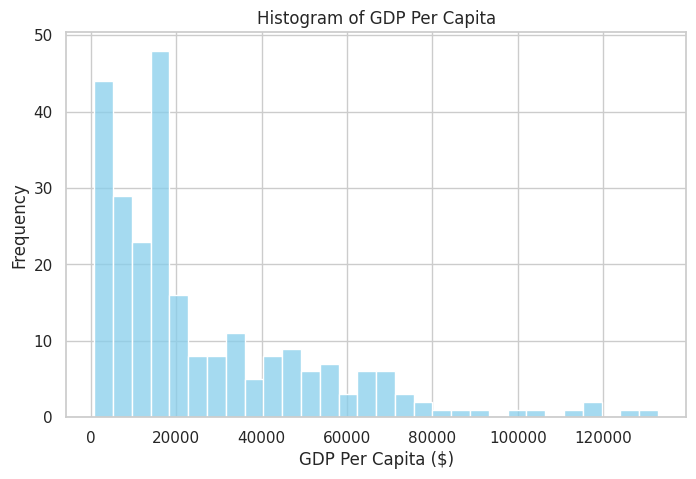

In [ ]:
# Visualization of distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(df['GDP Per Capita'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of GDP Per Capita')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Frequency')
plt.show()

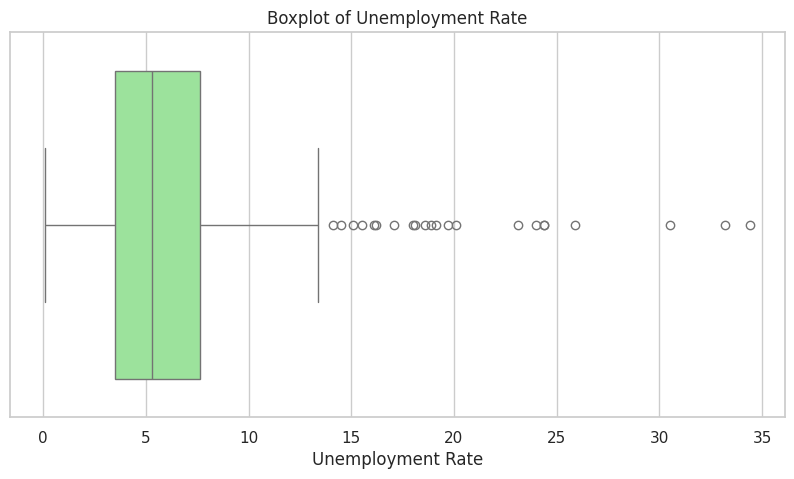

In [ ]:
# Visualization of distribution (Boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Unemployment Rate'], color='lightgreen')
plt.title('Boxplot of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.show()

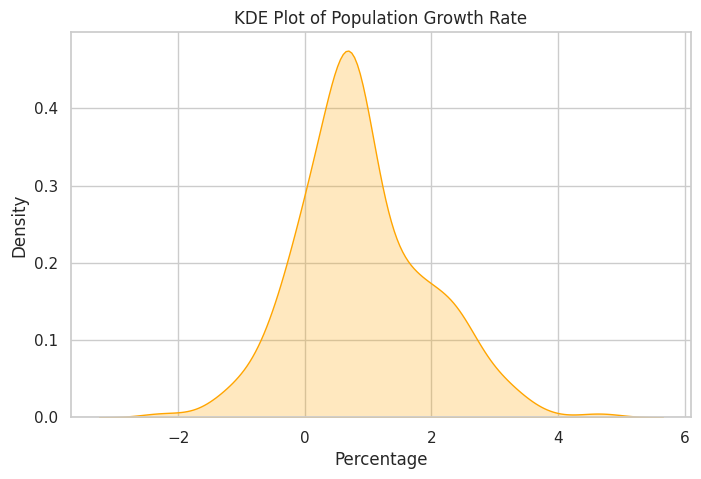

In [ ]:
# Visualization of distribution (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(df['Population Growth(%)'], fill=True, color='orange')
plt.title('KDE Plot of Population Growth Rate')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.show()

**BIVARIATE VISUALIZATIONS**



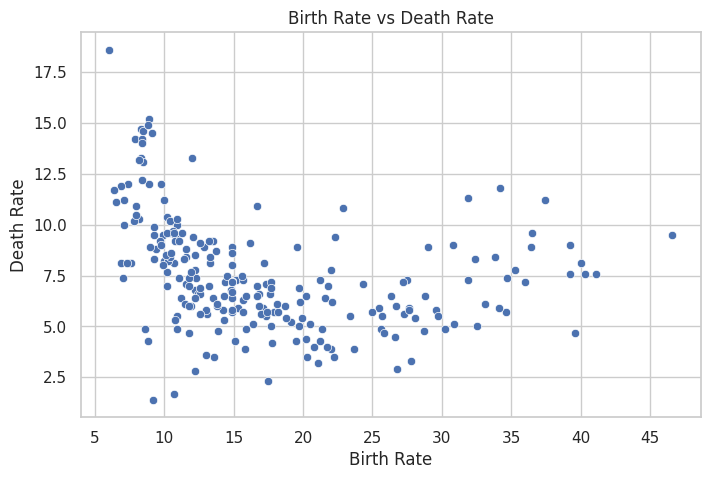

In [ ]:
# Scatter Plot: Birth Rate vs Death Rate Ratio
plt.figure(figsize=(8,5))
sns.scatterplot(x='Birth Rate', y='Death Rate', data=df)
plt.title('Birth Rate vs Death Rate')
plt.xlabel('Birth Rate')
plt.ylabel('Death Rate')
plt.show()

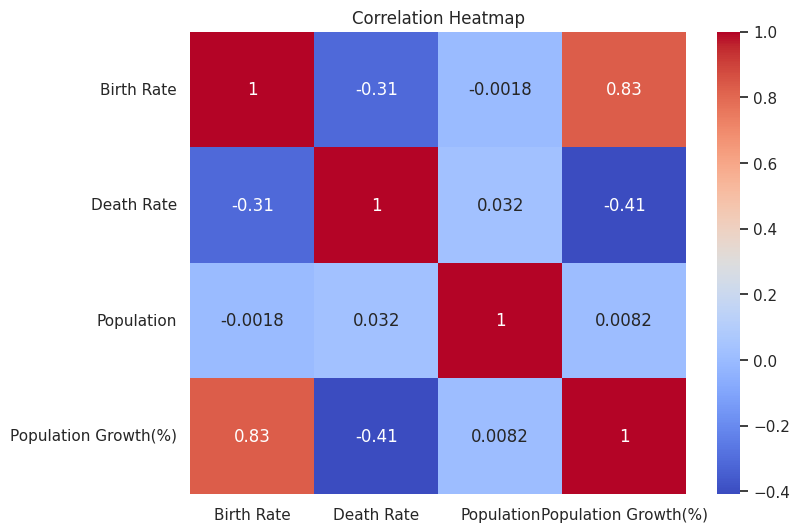

In [ ]:
# Heatmap: Birth Rate vs Death Rate

plt.figure(figsize=(8,6))
corr_cols = ['Birth Rate', 'Death Rate', 'Population', 'Population Growth(%)']

corr = df[corr_cols].corr()

corr.columns = corr_cols
corr.index = corr_cols

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipython-input-35-1158365129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y='GDP Per Capita', data=subset, palette='Set3')


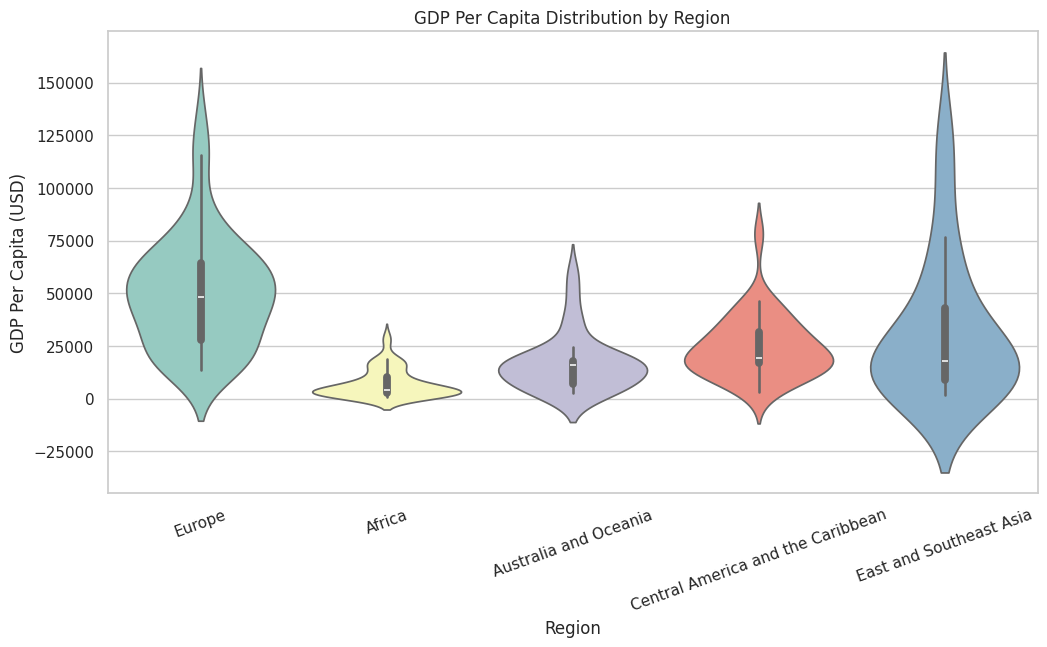

In [ ]:
# Bivariate comparison using Violin Plot

top_regions = df['Region'].value_counts().head(5).index
subset = df[df['Region'].isin(top_regions)]

plt.figure(figsize=(12,6))
sns.violinplot(x='Region', y='GDP Per Capita', data=subset, palette='Set3')
plt.title('GDP Per Capita Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GDP Per Capita (USD)')
plt.xticks(rotation=20)
plt.show()

**Relations Between Alcohol Consumption, Infant Deaths, and Age Dependency**

<Figure size 1000x800 with 0 Axes>

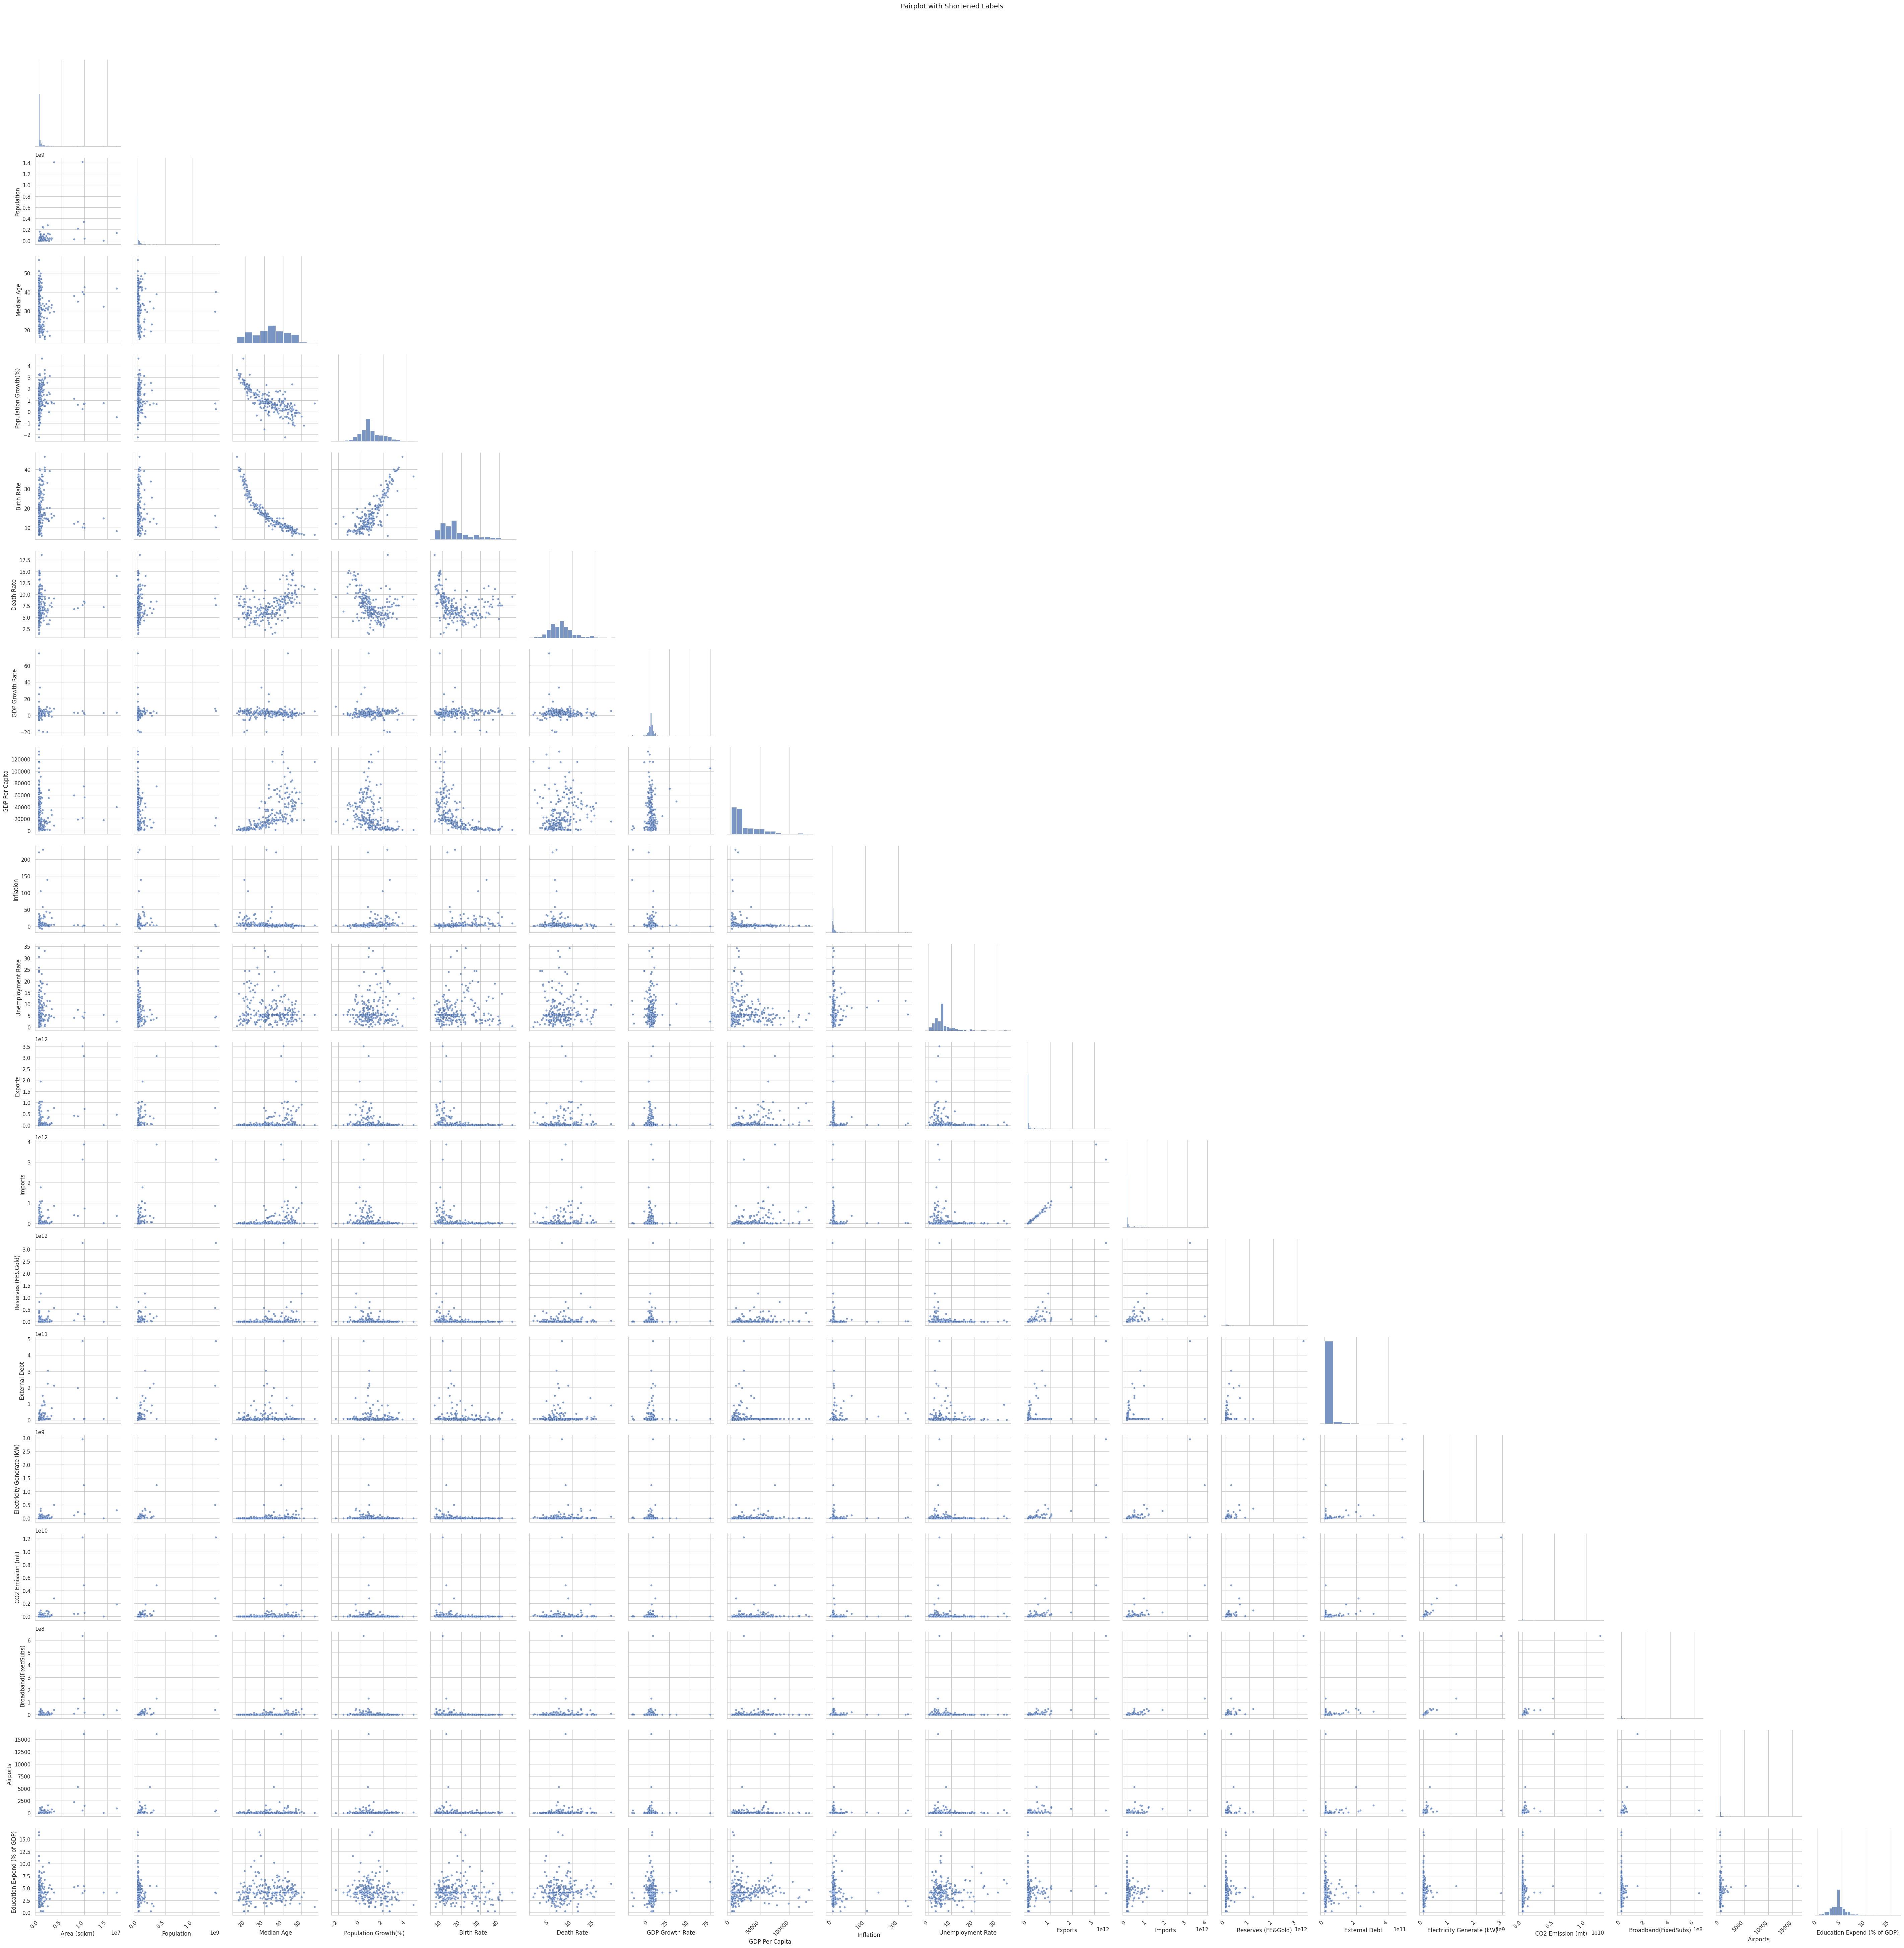

In [ ]:
# Generate pairplot with short labels
plt.figure(figsize=(10, 8))
pair_grid = sns.pairplot(
    df,
    corner=True,
    height=3,
    plot_kws={'s': 20, 'alpha': 0.7}
)
# Rotate x-axis labels safely
for ax in pair_grid.axes.flatten():
    if ax:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')

plt.suptitle('Pairplot with Shortened Labels', y=1.02)
plt.tight_layout()
plt.show()
pair_grid.savefig("pairplot.png", dpi=300, bbox_inches='tight')

**Scatter plot with regression line to highlight pattern**

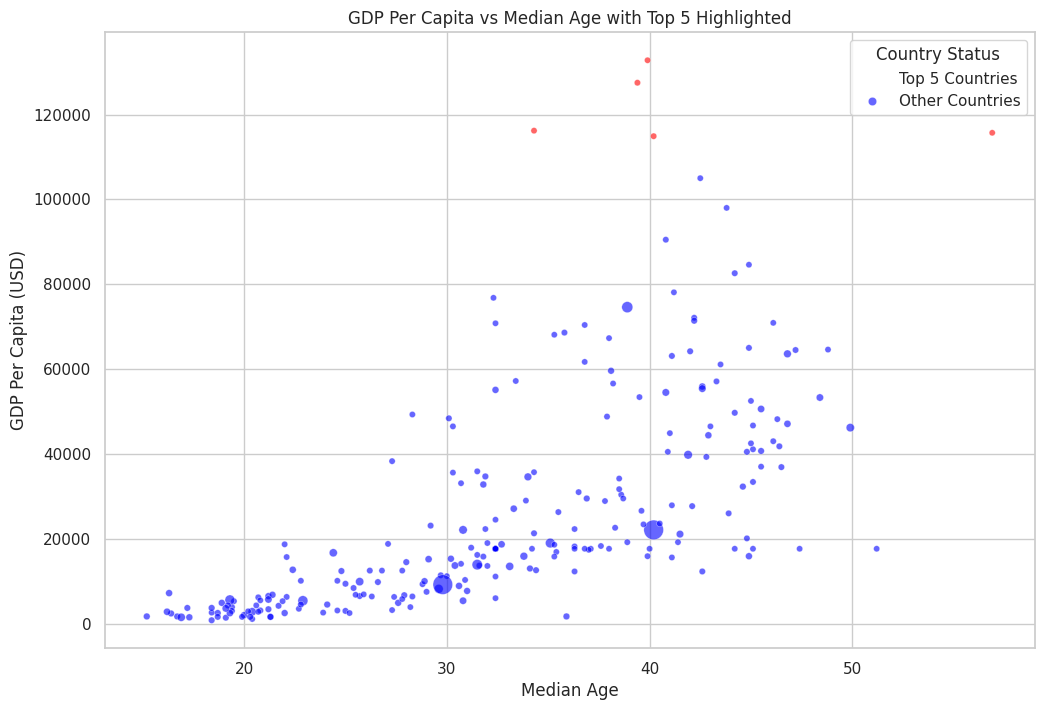

In [ ]:
top_countries = df.nlargest(5, 'GDP Per Capita')['Country']

plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x='Median Age',
    y='GDP Per Capita',
    data=df,
    alpha=0.6,
    hue=df['Country'].isin(top_countries),
    palette={True: 'red', False: 'blue'},
    size='Population',
    sizes=(20, 200)
)
plt.title('GDP Per Capita vs Median Age with Top 5 Highlighted')
plt.xlabel('Median Age')
plt.ylabel('GDP Per Capita (USD)')

# Add legend for hue
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles[:2],
    ['Top 5 Countries', 'Other Countries'],
    title='Country Status'
)
plt.show()

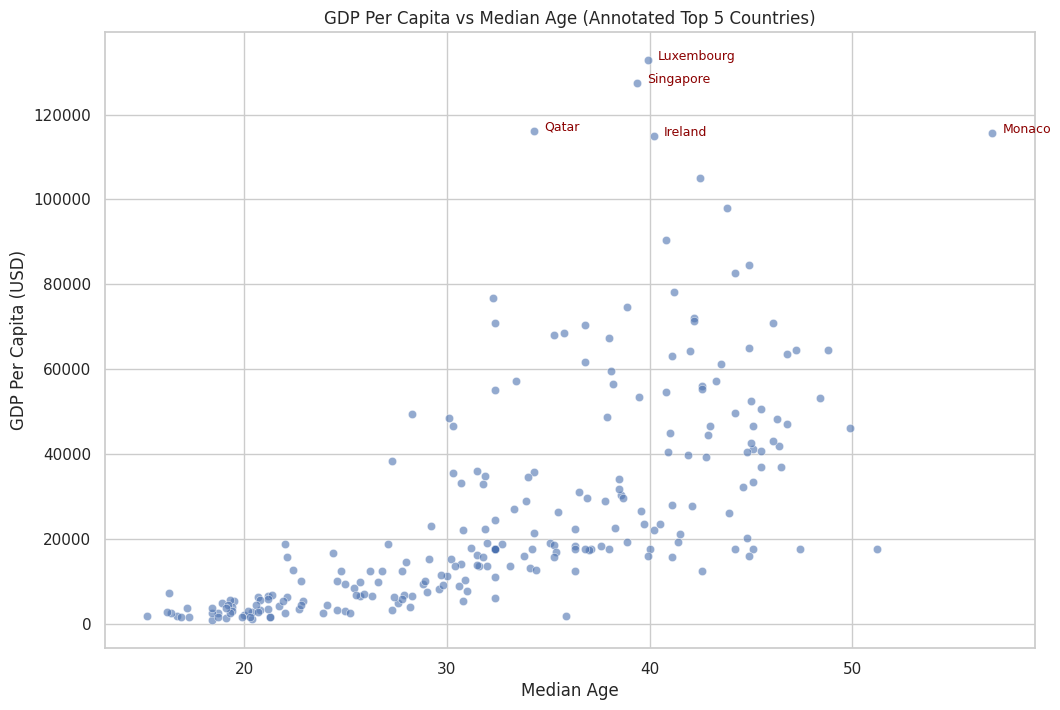

In [ ]:
# Scatter plot with annotation of outliers
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Median Age',
    y='GDP Per Capita',
    data=df,
    alpha=0.6
)
plt.title('GDP Per Capita vs Median Age (Annotated Top 5 Countries)')
plt.xlabel('Median Age')
plt.ylabel('GDP Per Capita (USD)')

# Add country labels to top 5 GDP Per Capita countries
top_gdp = df.nlargest(5, 'GDP Per Capita')
for _, row in top_gdp.iterrows():
    plt.text(
        row['Median Age'] + 0.5,
        row['GDP Per Capita'],
        row['Country'],
        fontsize=9,
        color='darkred'
    )
plt.show()


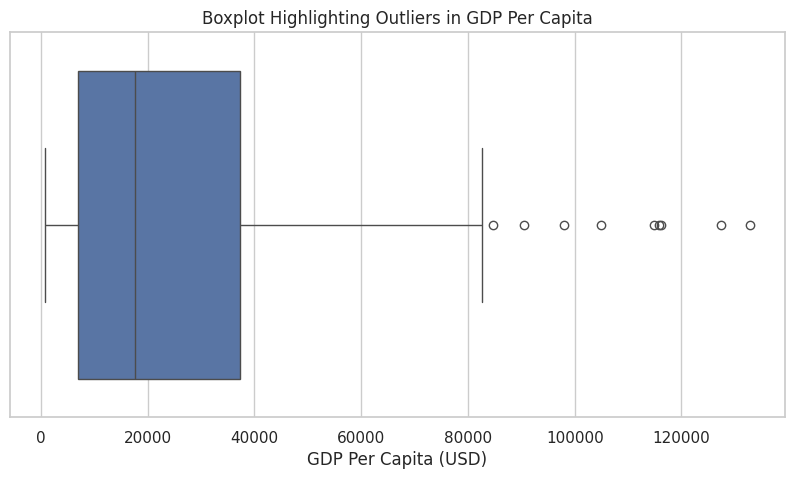

In [ ]:
# Outlier Detection via Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['GDP Per Capita'])
plt.title('Boxplot Highlighting Outliers in GDP Per Capita')
plt.xlabel('GDP Per Capita (USD)')
plt.show()

# **Multi-dimensional or Interactive Plot**

#### Economic Prosperity, Demographics, and Population by Region

In [ ]:
# Create the interactive bubble plot
fig = px.scatter(
    df,
    x="GDP Per Capita",
    y="Median Age",
    size="Population",
    color="Region",
    hover_name="Country",
    log_x=True,
    size_max=60,
    title="Economic Prosperity, Demographics, and Population by Region",
    labels={
        "GDP Per Capita": "GDP Per Capita (Log Scale)",
        "Median Age": "Median Age",
        "Population": "Population",
        "Region": "Geographical Region"
    },
    hover_data={
        'Population Growth(%)': True,
        'CO2 Emission (mt)': ':,',
        'Education Expend (% of GDP)': True,
        'Population': ':,',
        'GDP Per Capita': ':,'
    }
)

# Update layout for better presentation
fig.update_layout(
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    plot_bgcolor='white'
)

# Show the plot
fig.show()

#### Interactive Dashboard of Socio-Economic Indicators

In [ ]:
print("\n--- Generating Scatter Plot Matrix ---")

# Select dimensions that are likely to have interesting interactions
splom_dimensions = [
    'GDP Per Capita',
    'Median Age',
    'Unemployment Rate',
    'Birth Rate',
    'Inflation'
]

fig_splom = px.scatter_matrix(
    df,
    dimensions=splom_dimensions,
    color="Region",
    hover_name="Country",
    title="Interactive Dashboard of Socio-Economic Indicators"
)

# --- Professional Styling and Layout ---
fig_splom.update_layout(
    width=1000,
    height=1000,
    showlegend=True,
    dragmode='select'
)
# The diagonal shows histograms of each variable, which is very useful.
fig_splom.update_traces(diagonal_visible=True, showupperhalf=False)

fig_splom.show()


--- Generating Scatter Plot Matrix ---


#### display the geographic distribution of a specific metric

In [ ]:
def get_iso_alpha3(country_name):
    """
    Converts a country name to its ISO 3166-1 alpha-3 code.
    Handles common mismatches and returns None if no match is found.
    """
    # Manual mapping for names that pycountry might not recognize directly
    name_map = {
        'United States': 'USA',
        'United Kingdom': 'GBR',
        'Russia': 'RUS',
        'Congo, Democratic Republic of the': 'COD',
        'Congo, Republic of the': 'COG',
        'Korea, North': 'PRK',
        'Korea, South': 'KOR',
        'Taiwan': 'TWN',
        'West Bank': 'PSE',
        'Gaza Strip': 'PSE',
    }
    if country_name in name_map:
        return name_map[country_name]
    try:
        return pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except (LookupError, AttributeError):
        return None

# Apply the conversion function to the dataframe
print("\n--- Converting Country Names to ISO Codes ---")
df['iso_alpha'] = df['Country'].apply(get_iso_alpha3)
not_found = df[df['iso_alpha'].isnull()]['Country'].tolist()
if not_found:
    print(f"Could not find ISO codes for: {not_found}")

print("--- Generating Choropleth Map ---")

fig_map = px.choropleth(
    df.dropna(subset=['iso_alpha']),
    locations="iso_alpha",
    color="Unemployment Rate",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Greens,
    title="Global Unemployment Rates (%)",
    hover_data={'GDP Per Capita': ':,', 'Population': ':,'}
)

# --- Professional Styling and Layout ---
fig_map.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=10, r=10, b=10, t=50)
)

fig_map.show()


--- Converting Country Names to ISO Codes ---
Could not find ISO codes for: ['Akrotiri and Dhekelia', 'Ashmore and Cartier Islands', 'Bahamas The', 'Burma', 'Clipperton Island', 'Congo Democratic Republic of the', 'Congo Republic of the', 'Coral Sea Islands', 'Falkland Islands (Islas Malvinas)', 'French Southern and Antarctic Lands', 'Gambia The', 'Holy See (Vatican City)', 'Korea North', 'Korea South', 'Macau', 'Micronesia Federated States of', 'Paracel Islands', 'Pitcairn Islands', 'Saint Helena Ascension and Tristan da Cunha', 'South Georgia and South Sandwich Islands', 'Spratly Islands', 'Turkey (Turkiye)', 'United States Pacific Island Wildlife Refuges']
--- Generating Choropleth Map ---


#### Socio-Economic Profiles of the Top 10 Wealthiest Countries in Asia

In [ ]:
print("--- Generating Parallel Coordinates Plot for Top 10 Asian Countries ---")

dimensions_to_plot = [
    'GDP Per Capita',
    'Median Age',
    'Population Growth(%)',
    'Unemployment Rate',
    'Inflation_display',
    'Education Expend (% of GDP)'
]

# --- Data Filtering: Select Top 10 Countries in Asia by GDP Per Capita ---
df_top_asia = df[df['Region'].str.contains("Asia", na=False)].sort_values(by='GDP Per Capita', ascending=False).head(10).copy()

# --- Feature Engineering for Economic Analysis ---
epsilon = 1e-9

# 1. Log of Reserves: To handle the large scale and make the axis more readable.
df_top_asia['Reserves (Log Scale)'] = np.log10(df_top_asia['Reserves (FE&Gold)'] + epsilon)

# 2. Capped Inflation for display
df_top_asia['Inflation_display'] = df_top_asia['Inflation'].clip(-20, 50)

fig = px.parallel_coordinates(
    df_top_asia,
    dimensions=dimensions_to_plot,
    color="GDP Per Capita",
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={col: col.replace('_', ' ') for col in dimensions_to_plot},
    title="Socio-Economic Profiles of the Top 10 Wealthiest Countries in Asia"
)

# --- Professional Styling and Layout ---
fig.update_layout(
    title_x=0.5
)

fig.show()

--- Generating Parallel Coordinates Plot for Top 10 Asian Countries ---


#### Education Spending vs. Economic Indicators (3D Scatter Plot for Asia)

In [ ]:
# Filter the DataFrame for countries in Asia
df_asia = df[df['Region'].str.contains("Asia", na=False)].copy()

# Create the interactive 3D scatter plot
fig = px.scatter_3d(
    df_asia,
    x='Education Expend (% of GDP)',
    y='GDP Growth Rate',
    z='Unemployment Rate',
    color='Region',
    size='Population',
    hover_name='Country',
    title='Education Spending vs. Economic Indicators (3D Scatter Plot for Asia)',
    labels={
        'Education Expend (% of GDP)': 'Education Spending (% of GDP)',
        'GDP Growth Rate': 'GDP Growth Rate (%)',
        'Unemployment Rate': 'Unemployment Rate (%)',
        'Region': 'Region',
        'Population': 'Population'
    },
    hover_data={
        'Reserves (FE&Gold)': ':,',
        'Inflation': True,
        'Population': ':,',
        'GDP Per Capita': ':,',
        'Education Expend (% of GDP)': True,
        'GDP Growth Rate': True,
        'Unemployment Rate': True,
        'Population Growth(%)': True,
        'Region': False
    },
    size_max=100
)

# Customize the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

fig.show()

# **Time-Series or Geospatial Visualization**

In [ ]:
import plotly.express as px
import pycountry

df['CO2_per_Capita'] = df['CO2 Emission (mt)'] / df['Population']

def country_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df['iso_alpha'] = df['Country'].apply(country_to_iso3)

map_df = df.dropna(subset=['iso_alpha'])

fig = px.choropleth(
    map_df,
    locations='iso_alpha',
    color='CO2_per_Capita',
    hover_name='Country',
    color_continuous_scale='YlOrRd',
    labels={'CO2_per_Capita': 'CO₂ per Capita (mt/person)'},
    title='Global CO₂ Emissions by country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    coloraxis_colorbar=dict(title='mt/person')
)

fig.show()

text 2

In [ ]:
import pandas as pd
import folium
import pycountry
import requests

def country_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df['iso_alpha'] = df['Country'].apply(country_to_iso3)

map_df = df.dropna(subset=['iso_alpha'])

geo_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
world_geo = requests.get(geo_url).json()

metrics = {
    'External Debt': 'External Debt (USD)',
    'Electricity Generate (kW)': 'Electricity Generated (kW)',
    'Broadband(FixedSubs)': 'Fixed Broadband Subscriptions',
    'Airports': 'Number of Airports'
}

for col, label in metrics.items():
    m = folium.Map(location=[20, 0], zoom_start=2)

    folium.Choropleth(
        geo_data=world_geo,
        data=map_df,
        columns=['iso_alpha', col],
        key_on='feature.id',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=label
    ).add_to(m)

    folium.LayerControl().add_to(m)

    display(m)

# **Dashboard**